In [38]:
import pandas as pd

In [39]:
df=pd.read_csv('Mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
df=df.drop('CustomerID',axis=1)

In [41]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [42]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [43]:
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [45]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(df)

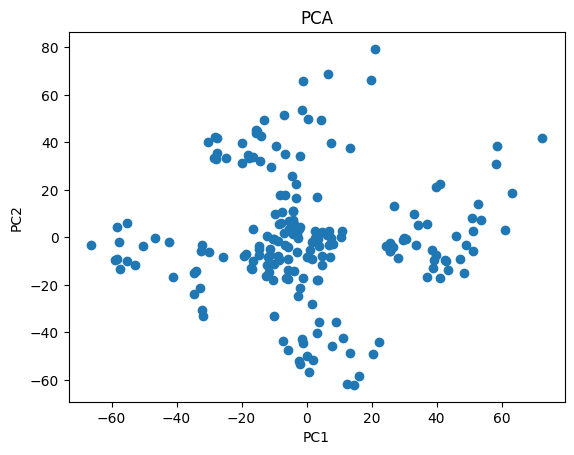

In [46]:
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

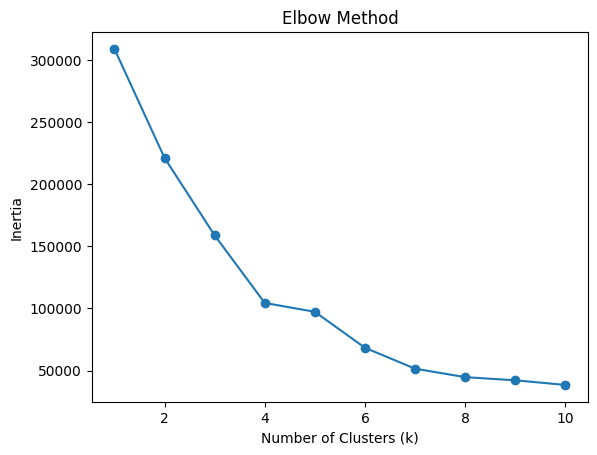

In [49]:
from sklearn.cluster import KMeans

x = df.values
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [50]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(x)


In [51]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0


In [52]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


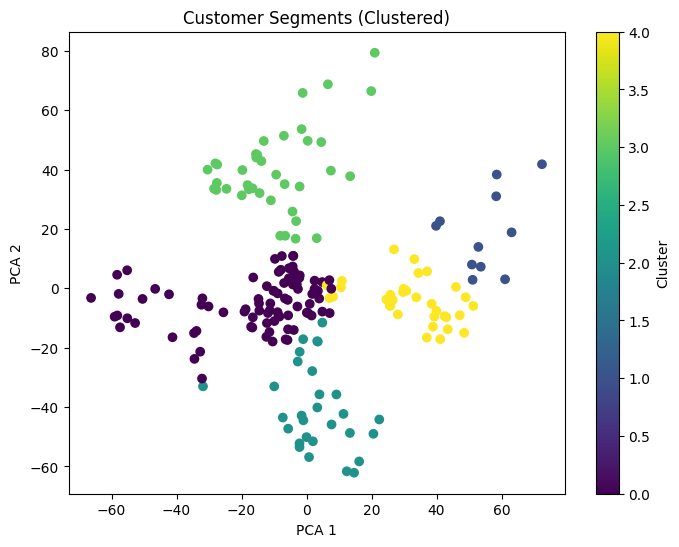

In [53]:
x_pca_clustered = pca.fit_transform(x)

plt.figure(figsize=(8, 6))
plt.scatter(x_pca_clustered[:, 0], x_pca_clustered[:, 1], c=df['Cluster'])
plt.title("Customer Segments (Clustered)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()


In [54]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.357


In [55]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.382022  46.213483           47.719101               41.797753
1        0.454545  32.454545          108.181818               82.727273
2        0.482759  24.689655           29.586207               73.655172
3        0.526316  40.394737           87.000000               18.631579
4        0.454545  31.787879           76.090909               77.757576


In [56]:
cluster_labels = {
    0: "Cautious Spenders",
    1: "Target Shoppers",
    2: "Carefree Spenders",
    3: "Budget Conscious",
    4: "Premium Customers"
}

df['Segment'] = df['Cluster'].map(cluster_labels)


In [57]:
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'Segment']].head())


   Age  Annual Income (k$)  Spending Score (1-100)  Cluster            Segment
0   19                  15                      39        2  Carefree Spenders
1   21                  15                      81        2  Carefree Spenders
2   20                  16                       6        0  Cautious Spenders
3   23                  16                      77        2  Carefree Spenders
4   31                  17                      40        0  Cautious Spenders
